In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import re
import datetime as dt
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import percentileofscore
import math

In [2]:
pd.set_option('display.max_rows',1000)

In [3]:
df = pd.read_excel("RFM_Shopee2.xlsx")

In [4]:
df.head(10)

,หมายเลขคำสั่งซื้อ,สถานะการสั่งซื้อ,เหตุผลในการยกเลิกคำสั่งซื้อ,สถานะการคืนเงินหรือคืนสินค้า,ชื่อผู้ใช้ (ผู้ซื้อ),วันที่ทำการสั่งซื้อ,เวลาที่ทำการสั่งซื้อ,วันการชำระสินค้า,เวลาที่ชำราะสินค้า,ช่องทางการชำระเงิน,...,หมายเลขโทรศัพท์,หมายเหตุจากผู้ซื้อ,ที่อยู่ในการจัดส่ง,ประเทศ,จังหวัด,เขต/อำเภอ,รหัสไปรษณีย์,ประเภทคำสั่งซื้อ,เวลาที่ทำการสั่งซื้อสำเร็จ,บันทึก
0,230303F0K2GMSE,สำเร็จแล้ว,NaN,NaN,da8606961,2023-03-03,11:13:00,2023-03-03 00:00:00,11:14:00,บัตรเครดิต/บัตรเดบิต,...,******48,NaN,"******ด (วัดใหญ่), สมุทรปราการ, พระสมุทรเจดีย์...",TH,จังหวัดสมุทรปราการ,อำเภอพระสมุทรเจดีย์,10290,NaN,2023-03-08 05:54,NaN
1,230303F2HFFVY5,สำเร็จแล้ว,NaN,NaN,eedubai,2023-03-03,11:48:00,2023-03-03 00:00:00,11:49:00,บัตรเครดิต/บัตรเดบิต,...,******65,NaN,******ก 2-1 ถ.วิภาวดีรังสิต เขตดินแดง จังหวัดก...,TH,จังหวัดกรุงเทพมหานคร,เขตดินแดง,10400,NaN,2023-03-04 21:15,NaN
2,230303FTFDVET8,สำเร็จแล้ว,NaN,NaN,da472d3d,2023-03-03,18:57:00,2023-03-03 00:00:00,18:57:00,ShopeePay - ยอดเงินใน Wallet,...,******04,NaN,"******/1, moo 12, Nong prue อำเภอบางละมุง จังห...",TH,จังหวัดชลบุรี,อำเภอบางละมุง,20150,NaN,2023-03-10 12:04,NaN
3,230303G23Q4AJK,สำเร็จแล้ว,NaN,NaN,hanumanchilisauce,2023-03-03,21:13:00,2023-03-03 00:00:00,21:14:00,บัตรเครดิต/บัตรเดบิต,...,******45,NaN,******14 แยก 4-2 เขตดินแดง จังหวัดกรุงเทพมหานค...,TH,จังหวัดกรุงเทพมหานคร,เขตดินแดง,10400,NaN,2023-03-08 21:51,NaN
4,230304GF4ST3NA,สำเร็จแล้ว,NaN,NaN,moebarbara,2023-03-04,01:07:00,2023-03-04 00:00:00,01:08:00,SPayLater,...,******53,NaN,******ิศ ซ.ประชาอุทิศ4 แขวงดอนเมือง เขตดอนเมือ...,TH,จังหวัดกรุงเทพมหานคร,เขตดอนเมือง,10210,NaN,2023-03-08 10:21,NaN
5,230305M9PTAVPB,สำเร็จแล้ว,NaN,NaN,pannipa_jan,2023-03-05,13:40:00,2023-03-05 00:00:00,13:40:00,Online Payment,...,******14,NaN,******/2 ถ.รามคำแหง แขวงหัวหมาก เขตบางกะปิ จัง...,TH,จังหวัดกรุงเทพมหานคร,เขตบางกะปิ,10240,NaN,2023-03-08 20:24,NaN
6,230306NBKM2EV5,สำเร็จแล้ว,NaN,NaN,wannapornw,2023-03-05,23:47:00,2023-03-05 00:00:00,23:47:00,บัตรเครดิต/บัตรเดบิต,...,******07,NaN,******ล ถ.สุขาภิบาล5 สายไหม เขตสายไหม จังหวัดก...,TH,จังหวัดกรุงเทพมหานคร,เขตสายไหม,10220,NaN,2023-03-09 11:39,NaN
7,230306NBKM2EV5,สำเร็จแล้ว,NaN,NaN,wannapornw,2023-03-05,23:47:00,2023-03-05 00:00:00,23:47:00,บัตรเครดิต/บัตรเดบิต,...,******07,NaN,******ล ถ.สุขาภิบาล5 สายไหม เขตสายไหม จังหวัดก...,TH,จังหวัดกรุงเทพมหานคร,เขตสายไหม,10220,NaN,2023-03-09 11:39,NaN
8,230306NBKM2EV5,สำเร็จแล้ว,NaN,NaN,wannapornw,2023-03-05,23:47:00,2023-03-05 00:00:00,23:47:00,บัตรเครดิต/บัตรเดบิต,...,******07,NaN,******ล ถ.สุขาภิบาล5 สายไหม เขตสายไหม จังหวัดก...,TH,จังหวัดกรุงเทพมหานคร,เขตสายไหม,10220,NaN,2023-03-09 11:39,NaN
9,230306NBKM2EV5,สำเร็จแล้ว,NaN,NaN,wannapornw,2023-03-05,23:47:00,2023-03-05 00:00:00,23:47:00,บัตรเครดิต/บัตรเดบิต,...,******07,NaN,******ล ถ.สุขาภิบาล5 สายไหม เขตสายไหม จังหวัดก...,TH,จังหวัดกรุงเทพมหานคร,เขตสายไหม,10220,NaN,2023-03-09 11:39,NaN


In [5]:
#duplicatesale = df["หมายเลขคำสั่งซื้อ"].drop_duplicates()

In [6]:
df = df[df["สถานะการสั่งซื้อ"]=="สำเร็จแล้ว"]

In [7]:
unique_order_ids = df['หมายเลขคำสั่งซื้อ'].unique()

In [8]:
unique_order_ids.size

157

In [9]:
sum_m = df.groupby('หมายเลขคำสั่งซื้อ', as_index=False)['ราคาขายสุทธิ'].sum()

In [10]:
dfsum = sum_m.copy()

In [11]:
dfsum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   หมายเลขคำสั่งซื้อ  157 non-null    object 
 1   ราคาขายสุทธิ       157 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.6+ KB


In [12]:
dfsum2 = df.groupby("หมายเลขคำสั่งซื้อ")["ชื่อผู้ใช้ (ผู้ซื้อ)"].first().reset_index()

In [13]:
dfsum3 = df.groupby(["หมายเลขคำสั่งซื้อ"]).first().reset_index()

In [14]:
dfsum3 = dfsum3[["หมายเลขคำสั่งซื้อ","ชื่อผู้ใช้ (ผู้ซื้อ)","วันที่ทำการสั่งซื้อ"]]

In [15]:
dfsum3["sales"] = dfsum["ราคาขายสุทธิ"]

In [16]:
dfsum3

,หมายเลขคำสั่งซื้อ,ชื่อผู้ใช้ (ผู้ซื้อ),วันที่ทำการสั่งซื้อ,sales
0,230303F0K2GMSE,da8606961,2023-03-03,752.0
1,230303F2HFFVY5,eedubai,2023-03-03,400.0
2,230303FTFDVET8,da472d3d,2023-03-03,338.0
3,230303G23Q4AJK,hanumanchilisauce,2023-03-03,338.0
4,230304GF4ST3NA,moebarbara,2023-03-04,188.0
5,230305M9PTAVPB,pannipa_jan,2023-03-05,338.0
6,230306NBKM2EV5,wannapornw,2023-03-05,179.0
7,230306PW5HSWV2,rainbowsilver,2023-03-06,507.0
8,230306QMMEK9MU,ice14ice,2023-03-06,198.0
9,230307QY8MT032,tphnns,2023-03-07,403.0


In [17]:
recency_df = dfsum3.groupby(['ชื่อผู้ใช้ (ผู้ซื้อ)'],as_index=False)['วันที่ทำการสั่งซื้อ'].max()
recency_df.columns = ['ชื่อผู้ใช้ (ผู้ซื้อ)','Recency']
recency_df

,ชื่อผู้ใช้ (ผู้ซื้อ),Recency
0,21_things,2023-03-25
1,3883ranya,2023-03-16
2,735d4jo1vm,2023-03-25
3,8djl907qnf,2023-04-19
4,_sq0v43sbh,2023-04-19
5,_yee7snl4o,2023-03-07
6,aa.kuromi,2023-05-15
7,aat161604,2023-04-08
8,abby0591,2023-04-01
9,aechita,2023-03-28


In [18]:
frequency_df = dfsum3.copy()
#frequency_df.drop_duplicates(subset=['ชื่อผู้ใช้ (ผู้ซื้อ)','วันที่ทำการสั่งซื้อ'], keep="first", inplace=True) 
frequency_df = frequency_df.groupby('ชื่อผู้ใช้ (ผู้ซื้อ)',as_index=False)['วันที่ทำการสั่งซื้อ'].count()
frequency_df.columns = ['ชื่อผู้ใช้ (ผู้ซื้อ)','Frequency']
frequency_df

,ชื่อผู้ใช้ (ผู้ซื้อ),Frequency
0,21_things,1
1,3883ranya,1
2,735d4jo1vm,1
3,8djl907qnf,1
4,_sq0v43sbh,1
5,_yee7snl4o,1
6,aa.kuromi,1
7,aat161604,2
8,abby0591,1
9,aechita,1


In [19]:
monetary_df=dfsum3.groupby('ชื่อผู้ใช้ (ผู้ซื้อ)',as_index=False)['sales'].mean()
monetary_df.columns = ['ชื่อผู้ใช้ (ผู้ซื้อ)','Monetary']

In [20]:
#monetary_df=dfsum3[["ชื่อผู้ใช้ (ผู้ซื้อ)","sales"]]
#monetary_df.columns = ['ชื่อผู้ใช้ (ผู้ซื้อ)','Monetary']

In [21]:
monetary_df

,ชื่อผู้ใช้ (ผู้ซื้อ),Monetary
0,21_things,1910.000000
1,3883ranya,180.000000
2,735d4jo1vm,336.000000
3,8djl907qnf,760.000000
4,_sq0v43sbh,336.000000
5,_yee7snl4o,338.000000
6,aa.kuromi,400.000000
7,aat161604,360.000000
8,abby0591,232.000000
9,aechita,175.000000


In [22]:
rf = recency_df.merge(frequency_df,left_on='ชื่อผู้ใช้ (ผู้ซื้อ)',right_on='ชื่อผู้ใช้ (ผู้ซื้อ)')

In [23]:
rfm = rf.merge(monetary_df,left_on='ชื่อผู้ใช้ (ผู้ซื้อ)',right_on='ชื่อผู้ใช้ (ผู้ซื้อ)')

In [24]:
rfm

,ชื่อผู้ใช้ (ผู้ซื้อ),Recency,Frequency,Monetary
0,21_things,2023-03-25,1,1910.000000
1,3883ranya,2023-03-16,1,180.000000
2,735d4jo1vm,2023-03-25,1,336.000000
3,8djl907qnf,2023-04-19,1,760.000000
4,_sq0v43sbh,2023-04-19,1,336.000000
5,_yee7snl4o,2023-03-07,1,338.000000
6,aa.kuromi,2023-05-15,1,400.000000
7,aat161604,2023-04-08,2,360.000000
8,abby0591,2023-04-01,1,232.000000
9,aechita,2023-03-28,1,175.000000


In [25]:
rfms = rfm.copy()

In [26]:
rfms

,ชื่อผู้ใช้ (ผู้ซื้อ),Recency,Frequency,Monetary
0,21_things,2023-03-25,1,1910.000000
1,3883ranya,2023-03-16,1,180.000000
2,735d4jo1vm,2023-03-25,1,336.000000
3,8djl907qnf,2023-04-19,1,760.000000
4,_sq0v43sbh,2023-04-19,1,336.000000
5,_yee7snl4o,2023-03-07,1,338.000000
6,aa.kuromi,2023-05-15,1,400.000000
7,aat161604,2023-04-08,2,360.000000
8,abby0591,2023-04-01,1,232.000000
9,aechita,2023-03-28,1,175.000000


In [27]:
#def percentrank_inc(data, score):
    #sorted_data = sorted(data)
    #n = len(sorted_data)
    #count_less = sum(1 for value in sorted_data if value < score)
    #count_equal = sorted_data.count(score)
    #return ((count_less + 0.5 * count_equal) / n) * 100

In [28]:
def perc_ranks(df_ele,col,df):
    s = pd.Series(df[col])
    num = df_ele[col]
    It = s[s<num].count()
    if len(s)>1:
        perc_ranks = It / (len(s)-1)
    else:
        perc_ranks = 0
    perc_ranks = int(perc_ranks*100000)/1000
    return perc_ranks

In [29]:
#rfms["R"] = rfms["Recency"].rank(pct=True)
#rfms["F"] = rfms["Frequency"].rank(pct=True)
#rfms["M"] = rfms["Monetary"].rank(pct=True)

In [30]:
rfms["R"] = rfms.apply(perc_ranks,args=("Recency",rfms),axis=1)
rfms["F"] = rfms.apply(perc_ranks,args=("Frequency",rfms),axis=1)
rfms["M"] = rfms.apply(perc_ranks,args=("Monetary",rfms),axis=1)

In [31]:
rfms

,ชื่อผู้ใช้ (ผู้ซื้อ),Recency,Frequency,Monetary,R,F,M
0,21_things,2023-03-25,1,1910.000000,23.134,0.000,100.000
1,3883ranya,2023-03-16,1,180.000000,12.686,0.000,13.432
2,735d4jo1vm,2023-03-25,1,336.000000,23.134,0.000,35.820
3,8djl907qnf,2023-04-19,1,760.000000,54.477,0.000,90.298
4,_sq0v43sbh,2023-04-19,1,336.000000,54.477,0.000,35.820
5,_yee7snl4o,2023-03-07,1,338.000000,4.477,0.000,39.552
6,aa.kuromi,2023-05-15,1,400.000000,76.119,0.000,59.701
7,aat161604,2023-04-08,2,360.000000,48.507,89.552,45.522
8,abby0591,2023-04-01,1,232.000000,31.343,0.000,25.373
9,aechita,2023-03-28,1,175.000000,26.865,0.000,11.194


In [32]:
def calculate_score(value):
    if value == 0:
        return 1
    else:
        return math.ceil(value / 20)


In [33]:
rfms['Rs'] = pd.qcut(rfms['R'], q=5, labels=[1, 2, 3, 4, 5])

rfms["Fs"]=rfms["F"].apply(calculate_score)
#rfms['Fs'] = pd.qcut(rfms['F'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])

 
rfms['Ms'] = pd.qcut(rfms['M'], q=5, labels=[1, 2, 3, 4, 5])


In [34]:
rfms

,ชื่อผู้ใช้ (ผู้ซื้อ),Recency,Frequency,Monetary,R,F,M,Rs,Fs,Ms
0,21_things,2023-03-25,1,1910.000000,23.134,0.000,100.000,2,1,5
1,3883ranya,2023-03-16,1,180.000000,12.686,0.000,13.432,1,1,1
2,735d4jo1vm,2023-03-25,1,336.000000,23.134,0.000,35.820,2,1,2
3,8djl907qnf,2023-04-19,1,760.000000,54.477,0.000,90.298,3,1,5
4,_sq0v43sbh,2023-04-19,1,336.000000,54.477,0.000,35.820,3,1,2
5,_yee7snl4o,2023-03-07,1,338.000000,4.477,0.000,39.552,1,1,2
6,aa.kuromi,2023-05-15,1,400.000000,76.119,0.000,59.701,4,1,3
7,aat161604,2023-04-08,2,360.000000,48.507,89.552,45.522,3,5,3
8,abby0591,2023-04-01,1,232.000000,31.343,0.000,25.373,2,1,2
9,aechita,2023-03-28,1,175.000000,26.865,0.000,11.194,2,1,1


In [35]:
#bins = np.linspace(0, 100, 5)  # แบ่งช่วงเป็น 4 ช่วง
#rfms['Rs'] = np.digitize(rfms['Rn'], bins)
#rfms['Fs'] = np.digitize(rfms['Fn'], bins)
#rfms['Ms'] = np.digitize(rfms['Mn'], bins)

In [36]:
rfms["RFM"] = rfms["Rs"].astype(str) + rfms["Fs"].astype(str) + rfms["Ms"].astype(str)

In [37]:
Champions = ["555","554","544","545","454","455","445"]
Loyalty = ["543","444","435","355","354","345","344","335"]
Potential_Loyalist = ["553","551","552","541","542","533","532","531","452","451","442","441","431","453","433","432","423","353","352","351","342","341","333","323"]
Newcustomer = ["512","511","422","421","412","411","311"]
Promising = ["525","524","523","522","521","515","514","513","425","424","413","414","415","315","314","313"]
NeedAttention = ['535','534',"443","434","343","334","325","324"]
Abouttosleep = ['331','321','312','221','213','231','241','251']
Atrisk = ['255','254','245','244','253','252','243','242','234','235','225','224','153','152','145','143','142','135','134','133','125','124']
Cannot = ['155','154','144','214','215','115','114','113']
Hiber = ['332','322','231','241','251','233','232','223','222','132','123','122','212','211']
Lost = ['111','112','121','131','141','151']


In [38]:
rfms

,ชื่อผู้ใช้ (ผู้ซื้อ),Recency,Frequency,Monetary,R,F,M,Rs,Fs,Ms,RFM
0,21_things,2023-03-25,1,1910.000000,23.134,0.000,100.000,2,1,5,215
1,3883ranya,2023-03-16,1,180.000000,12.686,0.000,13.432,1,1,1,111
2,735d4jo1vm,2023-03-25,1,336.000000,23.134,0.000,35.820,2,1,2,212
3,8djl907qnf,2023-04-19,1,760.000000,54.477,0.000,90.298,3,1,5,315
4,_sq0v43sbh,2023-04-19,1,336.000000,54.477,0.000,35.820,3,1,2,312
5,_yee7snl4o,2023-03-07,1,338.000000,4.477,0.000,39.552,1,1,2,112
6,aa.kuromi,2023-05-15,1,400.000000,76.119,0.000,59.701,4,1,3,413
7,aat161604,2023-04-08,2,360.000000,48.507,89.552,45.522,3,5,3,353
8,abby0591,2023-04-01,1,232.000000,31.343,0.000,25.373,2,1,2,212
9,aechita,2023-03-28,1,175.000000,26.865,0.000,11.194,2,1,1,211


In [39]:
rfms["score"] = rfms["Rs"].astype(int)+ rfms["Fs"].astype(int) + rfms["Ms"].astype(int)

In [40]:
rfms['segment'] = rfms['RFM'].apply(lambda x: 'Champions' if x in Champions
                                else 'Loyalty' if x in Loyalty
                                else 'PotentialLoyalist' if x in Potential_Loyalist
                                else "Newcustomer" if x in Newcustomer
                                else "Promising" if x in Promising
                                else "Need Attention" if x in NeedAttention
                                else "About to sleep" if x in Abouttosleep
                                else "At risk" if x in Atrisk
                                else "Cannot lose them" if x in Cannot
                                else "Hibernating customers" if x in Hiber
                                else "Lost" if x in Lost
                                else "Other")


In [41]:
rfms

,ชื่อผู้ใช้ (ผู้ซื้อ),Recency,Frequency,Monetary,R,F,M,Rs,Fs,Ms,RFM,score,segment
0,21_things,2023-03-25,1,1910.000000,23.134,0.000,100.000,2,1,5,215,8,Cannot lose them
1,3883ranya,2023-03-16,1,180.000000,12.686,0.000,13.432,1,1,1,111,3,Lost
2,735d4jo1vm,2023-03-25,1,336.000000,23.134,0.000,35.820,2,1,2,212,5,Hibernating customers
3,8djl907qnf,2023-04-19,1,760.000000,54.477,0.000,90.298,3,1,5,315,9,Promising
4,_sq0v43sbh,2023-04-19,1,336.000000,54.477,0.000,35.820,3,1,2,312,6,About to sleep
5,_yee7snl4o,2023-03-07,1,338.000000,4.477,0.000,39.552,1,1,2,112,4,Lost
6,aa.kuromi,2023-05-15,1,400.000000,76.119,0.000,59.701,4,1,3,413,8,Promising
7,aat161604,2023-04-08,2,360.000000,48.507,89.552,45.522,3,5,3,353,11,PotentialLoyalist
8,abby0591,2023-04-01,1,232.000000,31.343,0.000,25.373,2,1,2,212,5,Hibernating customers
9,aechita,2023-03-28,1,175.000000,26.865,0.000,11.194,2,1,1,211,4,Hibernating customers


In [42]:
rfms[rfms["segment"]=="Promising"]

,ชื่อผู้ใช้ (ผู้ซื้อ),Recency,Frequency,Monetary,R,F,M,Rs,Fs,Ms,RFM,score,segment
3,8djl907qnf,2023-04-19,1,760.0,54.477,0.0,90.298,3,1,5,315,9,Promising
6,aa.kuromi,2023-05-15,1,400.0,76.119,0.0,59.701,4,1,3,413,8,Promising
11,anaknong.yok,2023-05-13,1,400.0,71.641,0.0,59.701,4,1,3,413,8,Promising
15,baifern.byfern,2023-04-22,1,580.0,59.701,0.0,80.597,3,1,5,315,9,Promising
16,beautyfamily,2023-05-25,1,720.0,88.805,0.0,86.567,5,1,5,515,11,Promising
18,cardpanoth,2023-04-22,1,400.0,59.701,0.0,59.701,3,1,3,313,7,Promising
19,cecilelite,2023-05-09,1,636.0,67.164,0.0,82.089,4,1,5,415,10,Promising
23,cinist,2023-05-20,1,499.0,82.089,0.0,73.134,5,1,4,514,10,Promising
27,donutdony,2023-04-04,1,780.0,41.044,0.0,91.044,3,1,5,315,9,Promising
30,frozen_cute,2023-04-04,1,1087.0,41.044,0.0,94.776,3,1,5,315,9,Promising


<Axes: xlabel='Frequency', ylabel='Monetary'>

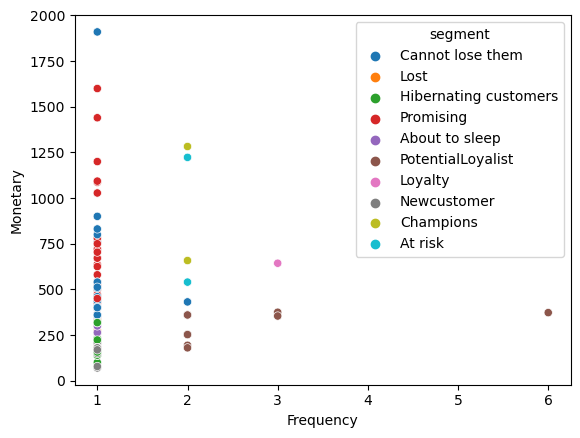

In [43]:
sns.scatterplot(data = rfms,x='Frequency',y='Monetary',hue='segment')

<Axes: xlabel='Recency', ylabel='Monetary'>

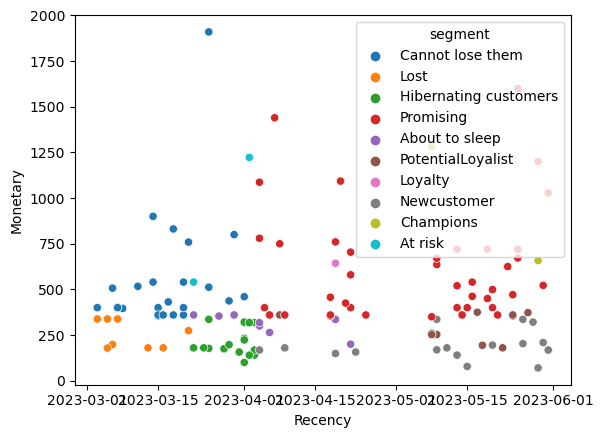

In [44]:
sns.scatterplot(data = rfms,x='Recency',y='Monetary',hue='segment')

<Axes: xlabel='Recency', ylabel='Frequency'>

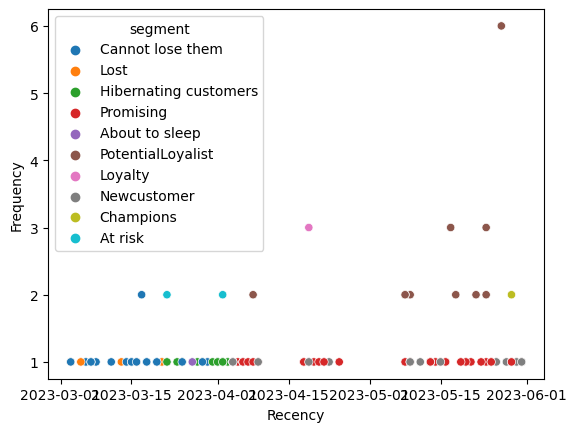

In [45]:
sns.scatterplot(data = rfms,x='Recency',y='Frequency',hue='segment')

In [46]:
rfms[rfms["segment"]=="Promising"]

,ชื่อผู้ใช้ (ผู้ซื้อ),Recency,Frequency,Monetary,R,F,M,Rs,Fs,Ms,RFM,score,segment
3,8djl907qnf,2023-04-19,1,760.0,54.477,0.0,90.298,3,1,5,315,9,Promising
6,aa.kuromi,2023-05-15,1,400.0,76.119,0.0,59.701,4,1,3,413,8,Promising
11,anaknong.yok,2023-05-13,1,400.0,71.641,0.0,59.701,4,1,3,413,8,Promising
15,baifern.byfern,2023-04-22,1,580.0,59.701,0.0,80.597,3,1,5,315,9,Promising
16,beautyfamily,2023-05-25,1,720.0,88.805,0.0,86.567,5,1,5,515,11,Promising
18,cardpanoth,2023-04-22,1,400.0,59.701,0.0,59.701,3,1,3,313,7,Promising
19,cecilelite,2023-05-09,1,636.0,67.164,0.0,82.089,4,1,5,415,10,Promising
23,cinist,2023-05-20,1,499.0,82.089,0.0,73.134,5,1,4,514,10,Promising
27,donutdony,2023-04-04,1,780.0,41.044,0.0,91.044,3,1,5,315,9,Promising
30,frozen_cute,2023-04-04,1,1087.0,41.044,0.0,94.776,3,1,5,315,9,Promising


In [50]:
rfms[rfms["ชื่อผู้ใช้ (ผู้ซื้อ)"]=="worapon_40"]

,ชื่อผู้ใช้ (ผู้ซื้อ),Recency,Frequency,Monetary,R,F,M,Rs,Fs,Ms,RFM,score,segment
132,worapon_40,2023-05-19,1,450.0,80.597,0.0,69.402,5,1,4,514,10,Promising


In [47]:
sizes = rfms['segment'].value_counts()
labels = sizes.index
colors = ['red', 'green', 'blue','yellow',"purple","orange","cyan","lightblue","pink","darksalmon"]

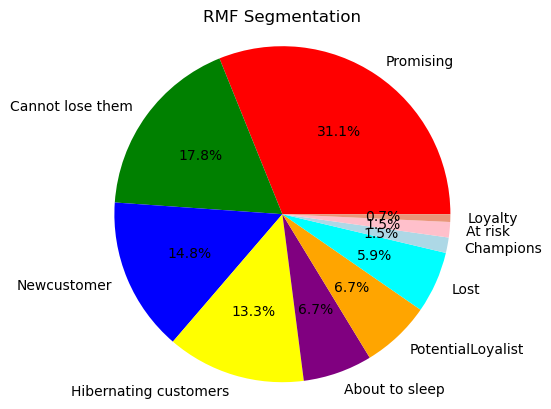

In [48]:
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.title('RMF Segmentation')
plt.show()

In [49]:
#pip install squarify

In [50]:
import squarify

In [51]:
rfmsum = rfms.groupby("segment",as_index=False)['score'].sum()

In [52]:
rfmsum

,segment,score
0,About to sleep,54
1,At risk,23
2,Cannot lose them,148
3,Champions,29
4,Hibernating customers,81
5,Lost,29
6,Loyalty,13
7,Newcustomer,132
8,PotentialLoyalist,105
9,Promising,377


In [53]:
numseg = rfms["segment"].value_counts()

In [54]:
numseg

Promising                42
Cannot lose them         24
Newcustomer              20
Hibernating customers    18
About to sleep            9
PotentialLoyalist         9
Lost                      8
Champions                 2
At risk                   2
Loyalty                   1
Name: segment, dtype: int64

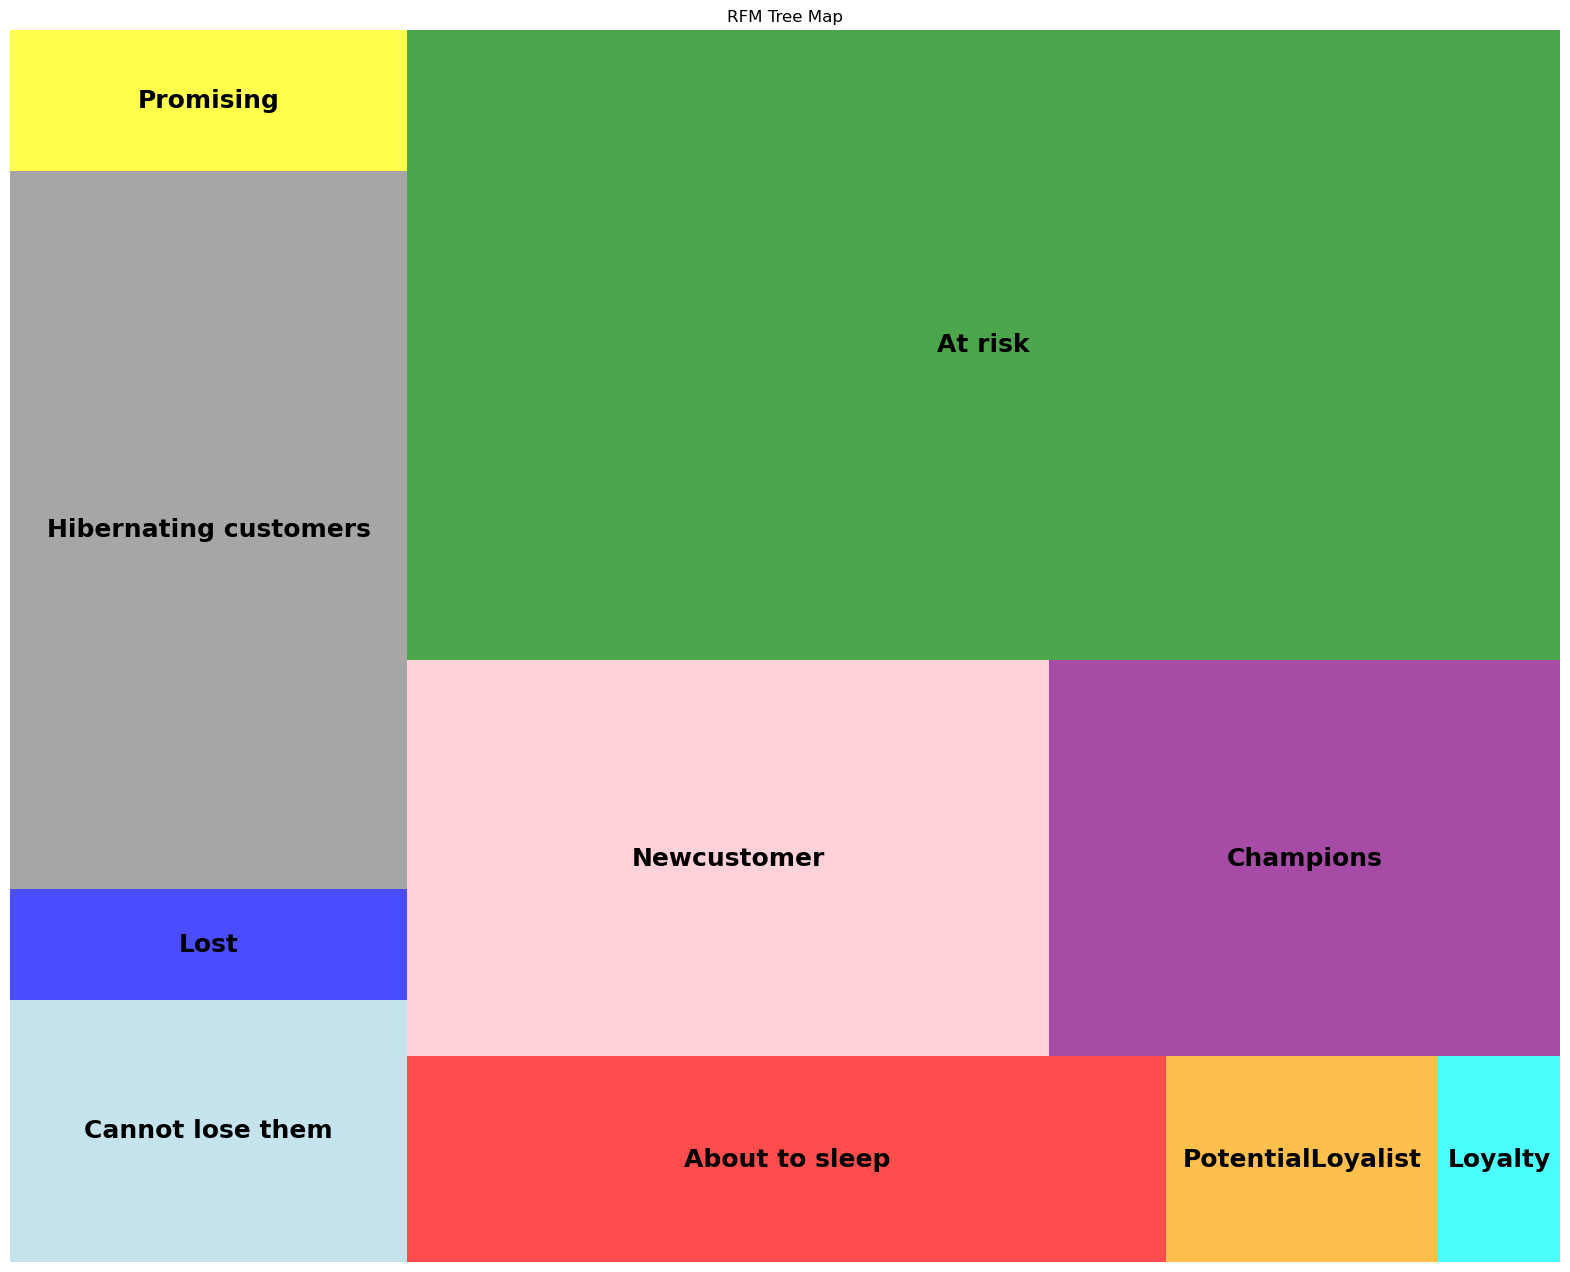

In [55]:
labels = rfms['segment'].unique()
sizes = rfmsum["score"]
colors = {
    'red',
    'green',
    'blue',
    'orange',
    'purple',
    'yellow',
    'gray',
    "pink","cyan","lightblue"
}

plt.figure(figsize=(20, 16))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.7,text_kwargs={'fontsize': 18, 'fontweight': 'bold'})
plt.axis('off')
plt.title('RFM Tree Map')

plt.show()

In [56]:
result = rfms[["ชื่อผู้ใช้ (ผู้ซื้อ)","Recency","Frequency","Monetary","segment"]]

In [57]:
result

,ชื่อผู้ใช้ (ผู้ซื้อ),Recency,Frequency,Monetary,segment
0,21_things,2023-03-25,1,1910.000000,Cannot lose them
1,3883ranya,2023-03-16,1,180.000000,Lost
2,735d4jo1vm,2023-03-25,1,336.000000,Hibernating customers
3,8djl907qnf,2023-04-19,1,760.000000,Promising
4,_sq0v43sbh,2023-04-19,1,336.000000,About to sleep
5,_yee7snl4o,2023-03-07,1,338.000000,Lost
6,aa.kuromi,2023-05-15,1,400.000000,Promising
7,aat161604,2023-04-08,2,360.000000,PotentialLoyalist
8,abby0591,2023-04-01,1,232.000000,Hibernating customers
9,aechita,2023-03-28,1,175.000000,Hibernating customers
